In [ ]:
from google.colab import files

uploaded = files.upload()

Saving combined_cleaned_train.csv to combined_cleaned_train.csv


In [ ]:
import pandas as pd

combined_train = pd.read_csv("combined_cleaned_train.csv")

In [ ]:
combined_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10002428,38875437,2156-04-22 06:00:00,220045,Heart Rate,0.465686,1
1,10002428,38875437,2156-04-22 06:00:00,220050,Arterial Blood Pressure systolic,0.400826,1
2,10002428,38875437,2156-04-22 06:00:00,220051,Arterial Blood Pressure diastolic,0.260000,1
3,10002428,38875437,2156-04-22 06:00:00,220052,Arterial Blood Pressure mean,0.346734,1
4,10002428,38875437,2156-04-22 06:00:00,220210,Respiratory Rate,0.440000,1


In [ ]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575231 entries, 0 to 575230
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   subject_id           575231 non-null  int64  
 1   stay_id              575231 non-null  int64  
 2   charttime            575231 non-null  object 
 3   itemid               575231 non-null  int64  
 4   label                575231 non-null  object 
 5   valuenum_normalized  575231 non-null  float64
 6   ext_success          575231 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 30.7+ MB


In [ ]:
uploaded = files.upload()

Saving combined_cleaned_test.csv to combined_cleaned_test.csv


In [ ]:
combined_test = pd.read_csv("combined_cleaned_test.csv")

In [ ]:
combined_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10004733,39635619,2174-12-07 05:00:00,220045,Heart Rate,0.323529,1
1,10004733,39635619,2174-12-07 05:00:00,220179,Non Invasive Blood Pressure systolic,0.514403,1
2,10004733,39635619,2174-12-07 05:00:00,220180,Non Invasive Blood Pressure diastolic,0.449102,1
3,10004733,39635619,2174-12-07 05:00:00,220181,Non Invasive Blood Pressure mean,0.447368,1
4,10004733,39635619,2174-12-07 05:00:00,220210,Respiratory Rate,0.260000,1


In [ ]:
combined_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143195 entries, 0 to 143194
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   subject_id           143195 non-null  int64  
 1   stay_id              143195 non-null  int64  
 2   charttime            143195 non-null  object 
 3   itemid               143195 non-null  int64  
 4   label                143195 non-null  object 
 5   valuenum_normalized  143195 non-null  float64
 6   ext_success          143195 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 7.6+ MB


In [ ]:
uploaded = files.upload()

Saving neurology_cleaned_train.csv to neurology_cleaned_train.csv


In [ ]:
uploaded = files.upload()

Saving neurology_cleaned_test.csv to neurology_cleaned_test.csv


In [ ]:
neurology_train = pd.read_csv("neurology_cleaned_train.csv")
neurology_test = pd.read_csv("neurology_cleaned_test.csv")

In [ ]:
neurology_train = neurology_train.drop(columns=['valuenum'])
neurology_test = neurology_test.drop(columns=['valuenum'])

In [ ]:
combined_train = pd.concat([combined_train, neurology_train], axis=0, ignore_index=True)
combined_test = pd.concat([combined_test, neurology_test], axis=0, ignore_index=True)

In [ ]:
combined_train['charttime'] = pd.to_datetime(combined_train['charttime'], errors='coerce')
combined_test['charttime'] = pd.to_datetime(combined_test['charttime'], errors='coerce')

In [ ]:
# Define the blood gas labels to extract
bloodgas_labels = ["Lactate", "Base Excess", "pO2", "pCO2", "pH"]

# Create bloodgas DataFrame by filtering rows with those labels
bloodgas_train = combined_train[combined_train['label'].isin(bloodgas_labels)].copy()

# Remove those rows from the original combined_train DataFrame
combined_train = combined_train[~combined_train['label'].isin(bloodgas_labels)].copy()

In [ ]:
# Define the blood gas labels to extract
bloodgas_labels = ["Lactate", "Base Excess", "pO2", "pCO2", "pH"]

# Create bloodgas_test DataFrame by filtering rows with those labels
bloodgas_test = combined_test[combined_test['label'].isin(bloodgas_labels)].copy()

# Remove those rows from the original combined_train DataFrame
combined_test = combined_test[~combined_test['label'].isin(bloodgas_labels)].copy()

In [ ]:
bloodgas_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
53,10002428,38875437,2156-04-22 10:31:00,50802,Base Excess,0.551020,1
54,10002428,38875437,2156-04-22 10:31:00,50813,Lactate,0.031373,1
55,10002428,38875437,2156-04-22 10:31:00,50818,pCO2,0.209677,1
56,10002428,38875437,2156-04-22 10:31:00,50820,pH,0.779070,1
57,10002428,38875437,2156-04-22 10:31:00,50821,pO2,0.290514,1


In [ ]:
bloodgas_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
189,10005817,31316840,2135-01-19 11:32:00,50802,Base Excess,0.714286,0
190,10005817,31316840,2135-01-19 11:32:00,50818,pCO2,0.185484,0
191,10005817,31316840,2135-01-19 11:32:00,50820,pH,0.918605,0
192,10005817,31316840,2135-01-19 11:32:00,50821,pO2,0.191700,0
211,10005817,31316840,2135-01-19 12:50:00,50802,Base Excess,0.673469,0


In [ ]:
uploaded = files.upload()

Saving fb_cleaned_train.csv to fb_cleaned_train.csv


In [ ]:
uploaded = files.upload()

Saving fb_cleaned_test.csv to fb_cleaned_test.csv


In [ ]:
fb_train = pd.read_csv("fb_cleaned_train.csv")
fb_test = pd.read_csv("fb_cleaned_test.csv")

In [ ]:
fb_train = fb_train.drop(columns=['valuenum'])
fb_test = fb_test.drop(columns=['valuenum'])

In [ ]:
fb_train.head()

,subject_id,stay_id,charttime,itemid,label,ext_success,valuenum_normalized
0,10002428,38875437,2156-04-22,123456,Fluid balance,1,0.012501
1,10004235,34100191,2196-02-27,123456,Fluid balance,1,0.469383
2,10004401,39699336,2144-06-18,123456,Fluid balance,0,0.006366
3,10013643,33072499,2200-10-02,123456,Fluid balance,1,0.526681
4,10014078,38907302,2166-08-23,123456,Fluid balance,1,0.057183


In [ ]:
fb_test.head()

,subject_id,stay_id,charttime,itemid,label,ext_success,valuenum_normalized
0,10004733,39635619,2174-12-07,123456,Fluid balance,1,0.024887
1,10005817,31316840,2135-01-19,123456,Fluid balance,0,0.006714
2,10006053,32895909,2111-11-15,123456,Fluid balance,0,0.234935
3,10017285,35690782,2166-05-07,123456,Fluid balance,1,0.110082
4,10032381,34622731,2115-07-15,123456,Fluid balance,1,-0.068526


In [ ]:
# Define the lab labels to extract
lab_labels = ["Alanine Aminotransferase (ALT)", "Albumin", "Alkaline Phosphatase", "Bilirubin, Total", "C-Reactive Protein", "Calcium, Total", "Creatinine", "Magnesium", "Phosphate", "Potassium", "Sodium", "Urea Nitrogen", "Eosinophils", "Hematocrit", "Hemoglobin", "INR(PT)", "Neutrophils", "Platelet Count", "PT", "PTT", "White Blood Cells"]

# Create lab DataFrame by filtering rows with those labels
lab_train = combined_train[combined_train['label'].isin(lab_labels)].copy()

# Keep the rest (non-lab rows) in combined_train if needed
combined_train = combined_train[~combined_train['label'].isin(lab_labels)].copy()

In [ ]:
# Define the lab labels to extract
lab_labels = ["Alanine Aminotransferase (ALT)", "Albumin", "Alkaline Phosphatase", "Bilirubin, Total", "C-Reactive Protein", "Calcium, Total", "Creatinine", "Magnesium", "Phosphate", "Potassium", "Sodium", "Urea Nitrogen", "Eosinophils", "Hematocrit", "Hemoglobin", "INR(PT)", "Neutrophils", "Platelet Count", "PT", "PTT", "White Blood Cells"]

# Create lab DataFrame by filtering rows with those labels
lab_test = combined_test[combined_test['label'].isin(lab_labels)].copy()

# Keep the rest (non-lab rows) in combined_train if needed
combined_test = combined_test[~combined_test['label'].isin(lab_labels)].copy()

In [ ]:
lab_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
104,10002428,38875437,2156-04-22 14:24:00,50960,Magnesium,0.382353,1
105,10002428,38875437,2156-04-22 14:24:00,50971,Potassium,0.272727,1
106,10002428,38875437,2156-04-22 14:24:00,50983,Sodium,0.477612,1
107,10002428,38875437,2156-04-22 14:24:00,51221,Hematocrit,0.310606,1
155,10004235,34100191,2196-02-27 05:19:00,50861,Alanine Aminotransferase (ALT),0.182365,1


In [ ]:
lab_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
22,10004733,39635619,2174-12-07 07:34:00,50893,"Calcium, Total",0.315217,1
23,10004733,39635619,2174-12-07 07:34:00,50912,Creatinine,0.459459,1
24,10004733,39635619,2174-12-07 07:34:00,50960,Magnesium,0.411765,1
25,10004733,39635619,2174-12-07 07:34:00,50970,Phosphate,0.720000,1
26,10004733,39635619,2174-12-07 07:34:00,50971,Potassium,0.309091,1


In [ ]:
# Creating 4h bins for universal time steps

# Sort
combined_train = combined_train.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
combined_train['window_start'] = combined_train.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
combined_train['hours_since_start'] = (combined_train['charttime'] - combined_train['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
combined_train['bin_4h'] = combined_train['hours_since_start'] // 4 +1

# Drop temp columns
combined_train = combined_train.drop(columns=['window_start', 'hours_since_start'])

# Preview
combined_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
2,10002428,38875437,2156-04-22 06:00:00,220051,Arterial Blood Pressure diastolic,0.260,1,1.0
8,10002428,38875437,2156-04-22 07:00:00,220051,Arterial Blood Pressure diastolic,0.320,1,1.0
25,10002428,38875437,2156-04-22 08:00:00,220051,Arterial Blood Pressure diastolic,0.315,1,1.0
31,10002428,38875437,2156-04-22 09:00:00,220051,Arterial Blood Pressure diastolic,0.340,1,1.0
49,10002428,38875437,2156-04-22 10:00:00,220051,Arterial Blood Pressure diastolic,0.345,1,2.0


In [ ]:
nan_counts = combined_train.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
import numpy as np

# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1.0,2.0,3.0,4.0
label,,,,
Arterial Blood Pressure diastolic,0.608098,0.602202,0.590352,0.515152
Arterial Blood Pressure mean,0.607848,0.602452,0.591352,0.575758
Arterial Blood Pressure systolic,0.608098,0.602202,0.590352,0.515152
EtCO2,0.015746,0.015261,0.009498,0.000000
GCS - Eye Opening,0.858785,0.860395,0.791552,0.181818
GCS - Motor Response,0.858285,0.857643,0.785554,0.181818
GCS - Verbal Response,0.858285,0.859395,0.790552,0.181818
Heart Rate,0.999500,0.999249,0.999500,0.969697
Inspired O2 Fraction,0.891277,0.890668,0.842539,0.424242


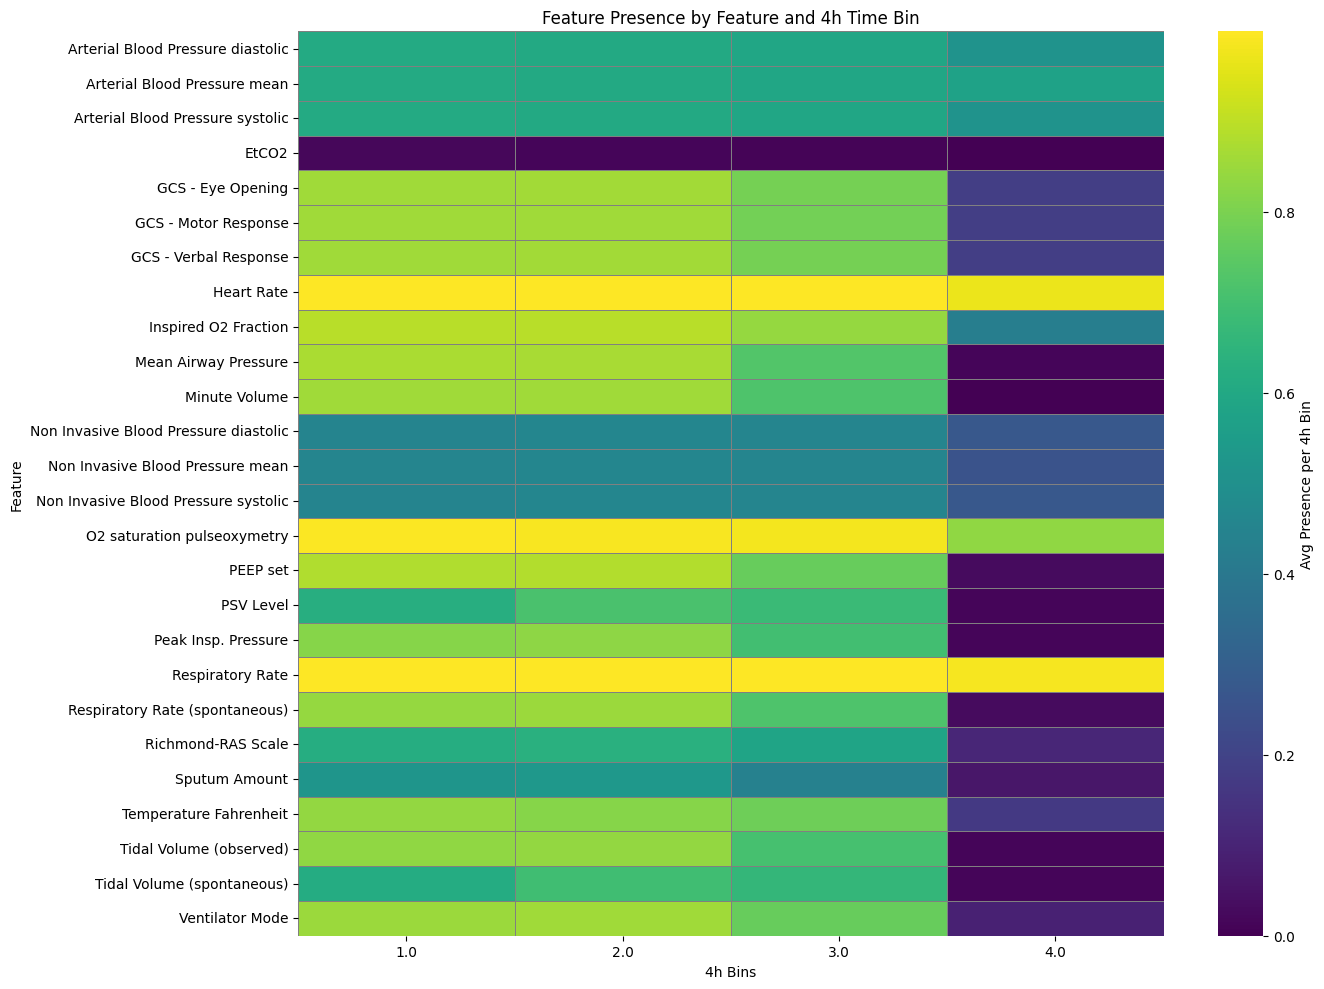

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Remove features that occur rarely

labels_to_drop = [
    "Calculated Bicarbonate, Whole Blood",
    "Chloride, Whole Blood",
    "Glucose",
    "Hematocrit, Calculated",
    "Inspiratory Time",
    "Plateau Pressure",
    "Potassium, Whole Blood",
    "Respiratory Rate (Set)",
    "SBT Stopped",
    "Sodium, Whole Blood",
    "Sputum Amount"
]

# Drop rows where 'label' is in the list
combined_train = combined_train[~combined_train['label'].isin(labels_to_drop)]

In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1.0,2.0,3.0,4.0
label,,,,
Arterial Blood Pressure diastolic,0.608098,0.602202,0.590352,0.515152
Arterial Blood Pressure mean,0.607848,0.602452,0.591352,0.575758
Arterial Blood Pressure systolic,0.608098,0.602202,0.590352,0.515152
EtCO2,0.015746,0.015261,0.009498,0.000000
GCS - Eye Opening,0.858785,0.860395,0.791552,0.181818
GCS - Motor Response,0.858285,0.857643,0.785554,0.181818
GCS - Verbal Response,0.858285,0.859395,0.790552,0.181818
Heart Rate,0.999500,0.999249,0.999500,0.969697
Inspired O2 Fraction,0.891277,0.890668,0.842539,0.424242


In [ ]:
patient_stays = combined_train[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    combined_train[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 4)  # bins 1 to 4

# All unique itemids
all_itemids = combined_train['itemid'].unique()

# Precompute global median per itemid
global_medians = combined_train.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = combined_train[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = combined_train[
        (combined_train['subject_id'] == subject_id) &
        (combined_train['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
combined_filled_train = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
combined_filled_train.head()

,itemid,bin_4h,valuenum_normalized,charttime,label,subject_id,stay_id,ext_success
0,220045,1,0.482843,2156-04-22 06:00:00,Heart Rate,10002428,38875437,1
1,220045,2,0.504902,2156-04-22 10:00:00,Heart Rate,10002428,38875437,1
2,220045,3,0.507353,2156-04-22 14:00:00,Heart Rate,10002428,38875437,1
3,220050,1,0.483471,2156-04-22 06:00:00,Arterial Blood Pressure systolic,10002428,38875437,1
4,220050,2,0.512397,2156-04-22 10:00:00,Arterial Blood Pressure systolic,10002428,38875437,1


In [ ]:
nan_counts = combined_filled_train.isna().sum()
print(nan_counts)

itemid                 0
bin_4h                 0
valuenum_normalized    0
charttime              0
label                  0
subject_id             0
stay_id                0
ext_success            0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_filled_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_filled_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1,2,3
label,,,
Arterial Blood Pressure diastolic,1.0,1.0,1.0
Arterial Blood Pressure mean,1.0,1.0,1.0
Arterial Blood Pressure systolic,1.0,1.0,1.0
EtCO2,1.0,1.0,1.0
GCS - Eye Opening,1.0,1.0,1.0
GCS - Motor Response,1.0,1.0,1.0
GCS - Verbal Response,1.0,1.0,1.0
Heart Rate,1.0,1.0,1.0
Inspired O2 Fraction,1.0,1.0,1.0


In [ ]:
# Creating 4h bins for universal time steps

# Sort
combined_test = combined_test.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
combined_test['window_start'] = combined_test.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
combined_test['hours_since_start'] = (combined_test['charttime'] - combined_test['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
combined_test['bin_4h'] = combined_test['hours_since_start'] // 4 +1

# Drop temp columns
combined_test = combined_test.drop(columns=['window_start', 'hours_since_start'])

# Preview
combined_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
143196,10004733,39635619,2174-12-07 08:00:00,220739,GCS - Eye Opening,0.400000,1,1.0
143198,10004733,39635619,2174-12-07 08:00:00,223901,GCS - Motor Response,1.000000,1,1.0
143197,10004733,39635619,2174-12-07 08:00:00,223900,GCS - Verbal Response,0.000000,1,1.0
0,10004733,39635619,2174-12-07 05:00:00,220045,Heart Rate,0.323529,1,1.0
6,10004733,39635619,2174-12-07 06:00:00,220045,Heart Rate,0.338235,1,1.0


In [ ]:
nan_counts = combined_test.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1.0,2.0,3.0,4.0
label,,,,
Arterial Blood Pressure diastolic,0.611612,0.607214,0.596597,0.500000
Arterial Blood Pressure mean,0.611612,0.609218,0.599600,0.555556
Arterial Blood Pressure systolic,0.611612,0.607214,0.596597,0.500000
EtCO2,0.014014,0.012024,0.006006,0.000000
GCS - Eye Opening,0.878879,0.861723,0.775776,0.111111
GCS - Motor Response,0.877878,0.858717,0.772773,0.111111
GCS - Verbal Response,0.875876,0.856713,0.771772,0.111111
Heart Rate,0.998999,0.998998,0.998999,0.944444
Inspired O2 Fraction,0.879880,0.876754,0.839840,0.333333


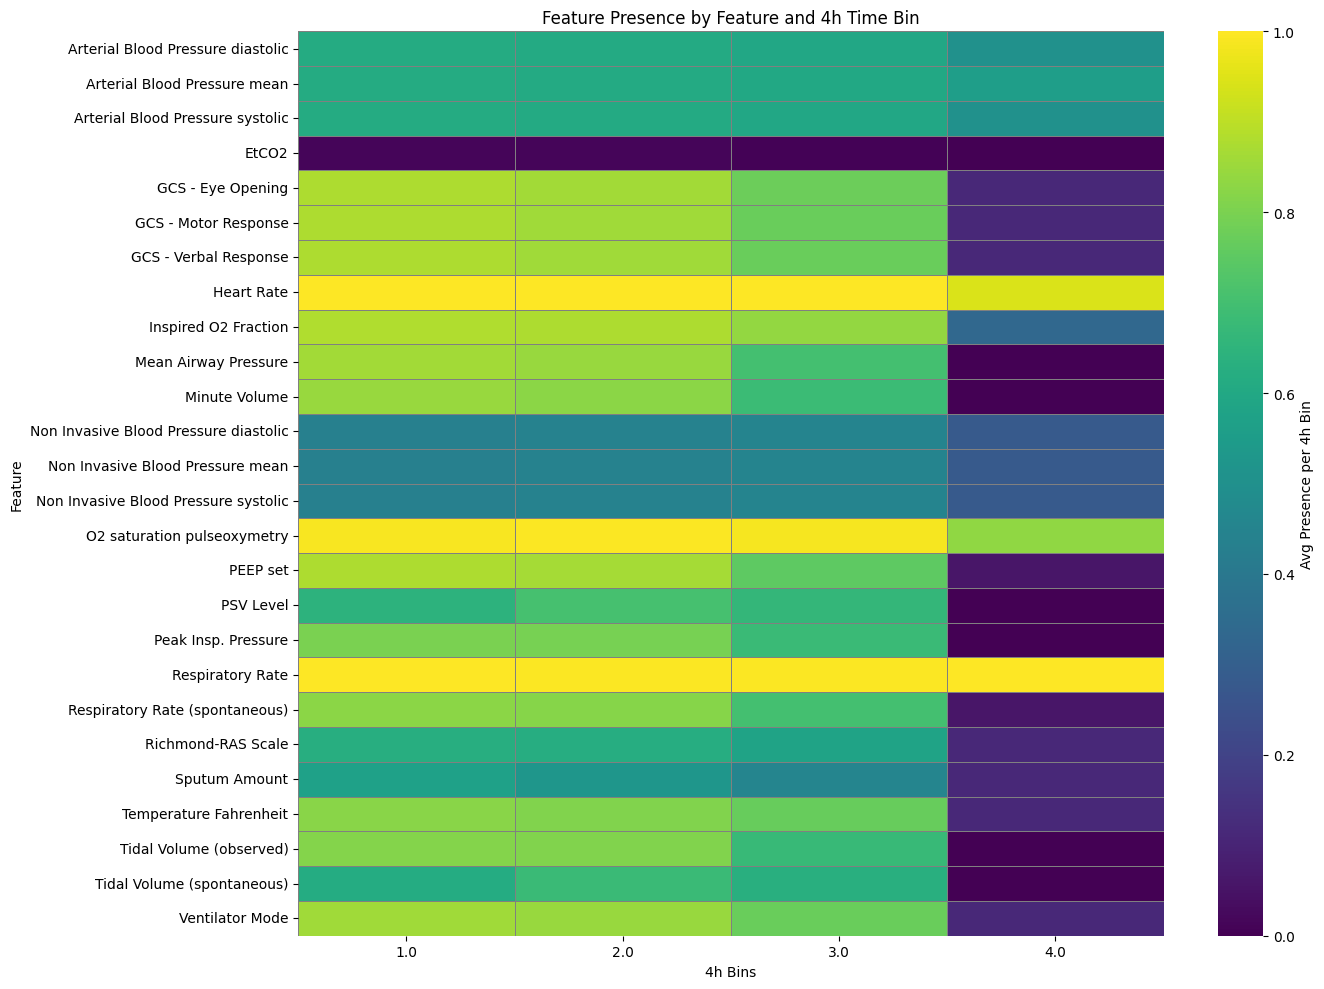

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# Remove features that occur rarely

labels_to_drop = [
    "Calculated Bicarbonate, Whole Blood",
    "Chloride, Whole Blood",
    "Glucose",
    "Hematocrit, Calculated",
    "Inspiratory Time",
    "Plateau Pressure",
    "Potassium, Whole Blood",
    "Respiratory Rate (Set)",
    "SBT Stopped",
    "Sodium, Whole Blood",
    "Sputum Amount"
]

# Drop rows where 'label' is in the list
combined_test = combined_test[~combined_test['label'].isin(labels_to_drop)]

In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1.0,2.0,3.0,4.0
label,,,,
Arterial Blood Pressure diastolic,0.608098,0.602202,0.590352,0.515152
Arterial Blood Pressure mean,0.607848,0.602452,0.591352,0.575758
Arterial Blood Pressure systolic,0.608098,0.602202,0.590352,0.515152
EtCO2,0.015746,0.015261,0.009498,0.000000
GCS - Eye Opening,0.858785,0.860395,0.791552,0.181818
GCS - Motor Response,0.858285,0.857643,0.785554,0.181818
GCS - Verbal Response,0.858285,0.859395,0.790552,0.181818
Heart Rate,0.999500,0.999249,0.999500,0.969697
Inspired O2 Fraction,0.891277,0.890668,0.842539,0.424242


In [ ]:
patient_stays = combined_test[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    combined_test[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 4)  # bins 1 to 4

# All unique itemids
all_itemids = combined_test['itemid'].unique()

# Precompute global median per itemid
global_medians = combined_test.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = combined_test[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = combined_test[
        (combined_test['subject_id'] == subject_id) &
        (combined_test['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
combined_filled_test = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
nan_counts = combined_filled_test.isna().sum()
print(nan_counts)

itemid                 0
bin_4h                 0
valuenum_normalized    0
charttime              0
label                  0
subject_id             0
stay_id                0
ext_success            0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    combined_filled_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    combined_filled_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(25)

bin_4h,1,2,3
label,,,
Arterial Blood Pressure diastolic,1.0,1.0,1.0
Arterial Blood Pressure mean,1.0,1.0,1.0
Arterial Blood Pressure systolic,1.0,1.0,1.0
EtCO2,1.0,1.0,1.0
GCS - Eye Opening,1.0,1.0,1.0
GCS - Motor Response,1.0,1.0,1.0
GCS - Verbal Response,1.0,1.0,1.0
Heart Rate,1.0,1.0,1.0
Inspired O2 Fraction,1.0,1.0,1.0


In [ ]:
# For bloodgas dataframes, calculate how many times each label appears per subject_id and stay_id

label_counts = (
    bloodgas_train
    .groupby(['subject_id', 'stay_id', 'label'])
    .size()
    .reset_index(name='count')
)

average_counts = (
    label_counts
    .groupby('label')['count']
    .mean()
    .reset_index(name='average_count')
    .sort_values(by='average_count', ascending=False)
)

print(average_counts)

         label  average_count
3           pH       2.100716
4          pO2       2.053173
2         pCO2       2.052316
0  Base Excess       2.050193
1      Lactate       1.594867


In [ ]:
label_counts = (
    bloodgas_test
    .groupby(['subject_id', 'stay_id', 'label'])
    .size()
    .reset_index(name='count')
)

average_counts = (
    label_counts
    .groupby('label')['count']
    .mean()
    .reset_index(name='average_count')
    .sort_values(by='average_count', ascending=False)
)

print(average_counts)

         label  average_count
3           pH       2.011589
0  Base Excess       1.969440
2         pCO2       1.967797
4          pO2       1.967797
1      Lactate       1.582734


In [ ]:
# Creating 4h bins for universal time steps

# Sort
bloodgas_train = bloodgas_train.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
bloodgas_train['window_start'] = bloodgas_train.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
bloodgas_train['hours_since_start'] = (bloodgas_train['charttime'] - bloodgas_train['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
bloodgas_train['bin_4h'] = bloodgas_train['hours_since_start'] // 4 +1

# Drop temp columns
bloodgas_train = bloodgas_train.drop(columns=['window_start', 'hours_since_start'])

# Preview
bloodgas_train.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
53,10002428,38875437,2156-04-22 10:31:00,50802,Base Excess,0.551020,1,1.0
141,10002428,38875437,2156-04-22 16:52:00,50802,Base Excess,0.591837,1,2.0
54,10002428,38875437,2156-04-22 10:31:00,50813,Lactate,0.031373,1,1.0
55,10002428,38875437,2156-04-22 10:31:00,50818,pCO2,0.209677,1,1.0
142,10002428,38875437,2156-04-22 16:52:00,50818,pCO2,0.233871,1,2.0


In [ ]:
nan_counts = bloodgas_train.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    bloodgas_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1.0,2.0,3.0
label,,,
Base Excess,0.963211,0.962010,0.961905
Lactate,0.403846,0.368873,0.263492
pCO2,0.963629,0.965686,0.965079
pH,0.990803,0.991422,1.000000
pO2,0.963629,0.966912,0.965079


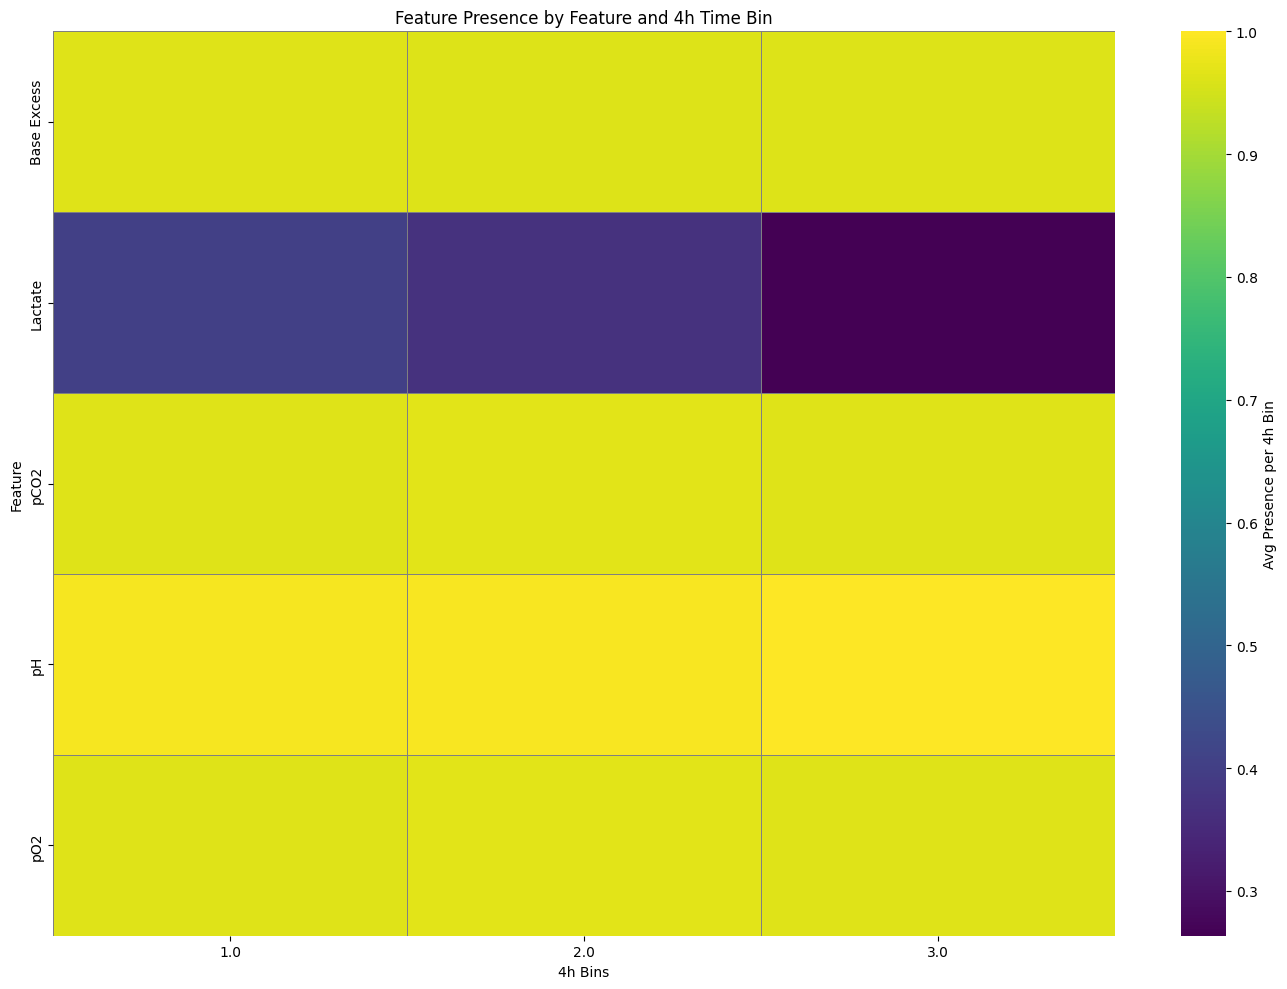

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
patient_stays = bloodgas_train[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    bloodgas_train[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 4)  # bins 1 to 4

# All unique itemids
all_itemids = bloodgas_train['itemid'].unique()

# Precompute global median per itemid
global_medians = bloodgas_train.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = bloodgas_train[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = bloodgas_train[
        (bloodgas_train['subject_id'] == subject_id) &
        (bloodgas_train['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
bloodgas_filled_train = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    bloodgas_filled_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_filled_train[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head(65)

bin_4h,1.0,2.0,3.0
label,,,
Base Excess,1.0,1.0,1.0
Lactate,1.0,1.0,1.0
pCO2,1.0,1.0,1.0
pH,1.0,1.0,1.0
pO2,1.0,1.0,1.0


In [ ]:
# Creating 4h bins for universal time steps

# Sort
bloodgas_test = bloodgas_test.sort_values(['subject_id', 'stay_id', 'label', 'charttime'])

# Calculate the earliest charttime per subject_id and stay_id
bloodgas_test['window_start'] = bloodgas_test.groupby(['subject_id', 'stay_id'])['charttime'].transform('min')

# Calculate time difference in hours from the start
bloodgas_test['hours_since_start'] = (bloodgas_test['charttime'] - bloodgas_test['window_start']).dt.total_seconds() / 3600

# Assign a 4-hour bin number (0 = first 4h, 1 = second 4h, etc.)
bloodgas_test['bin_4h'] = bloodgas_test['hours_since_start'] // 4 +1

# Drop temp columns
bloodgas_test = bloodgas_test.drop(columns=['window_start', 'hours_since_start'])

# Preview
bloodgas_test.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success,bin_4h
189,10005817,31316840,2135-01-19 11:32:00,50802,Base Excess,0.714286,0,1.0
211,10005817,31316840,2135-01-19 12:50:00,50802,Base Excess,0.673469,0,1.0
212,10005817,31316840,2135-01-19 12:50:00,50813,Lactate,0.035294,0,1.0
190,10005817,31316840,2135-01-19 11:32:00,50818,pCO2,0.185484,0,1.0
213,10005817,31316840,2135-01-19 12:50:00,50818,pCO2,0.161290,0,1.0


In [ ]:
nan_counts = bloodgas_test.isna().sum()
print(nan_counts)

subject_id             0
stay_id                0
charttime              0
itemid                 0
label                  0
valuenum_normalized    0
ext_success            0
bin_4h                 0
dtype: int64


In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    bloodgas_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head()

bin_4h,1.0,2.0,3.0
label,,,
Base Excess,0.953947,0.965854,0.973684
Lactate,0.421053,0.341463,0.250000
pCO2,0.955592,0.965854,0.973684
pH,0.993421,0.995122,1.000000
pO2,0.955592,0.965854,0.973684


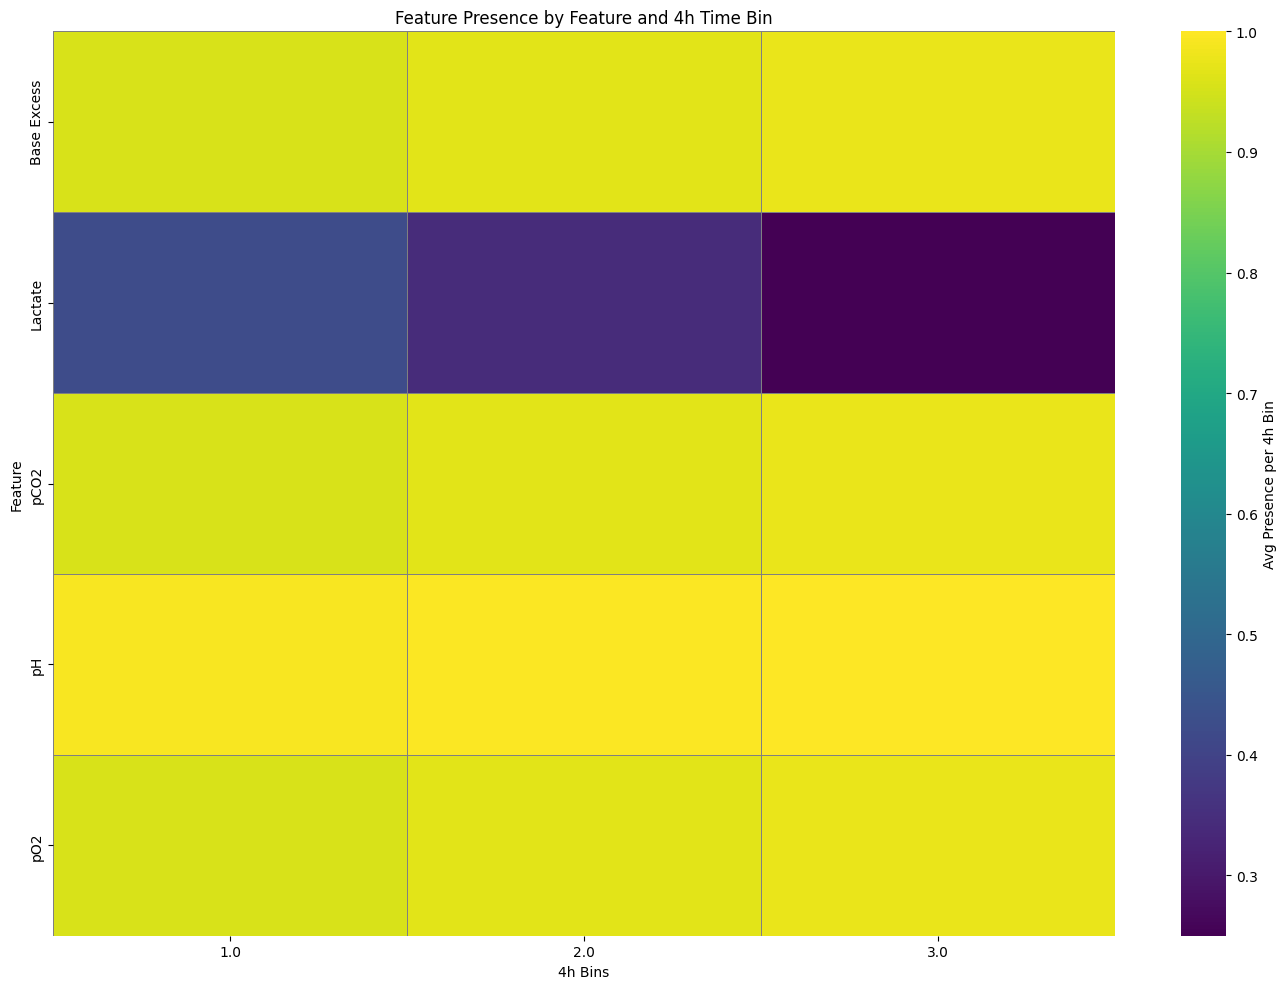

In [ ]:
plt.figure(figsize=(14, 10))

sns.heatmap(
    presence_matrix,
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Avg Presence per 4h Bin'}
)

plt.title("Feature Presence by Feature and 4h Time Bin")
plt.xlabel("4h Bins")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
patient_stays = bloodgas_test[['subject_id', 'stay_id']].drop_duplicates()

ext_success_map = (
    bloodgas_test[['subject_id', 'stay_id', 'ext_success']]
    .drop_duplicates(subset=['subject_id', 'stay_id'])
    .set_index(['subject_id', 'stay_id'])['ext_success']
)

# Set full range of bins
full_bin_range = np.arange(1, 4)  # bins 1 to 4

# All unique itemids
all_itemids = bloodgas_test['itemid'].unique()

# Precompute global median per itemid
global_medians = bloodgas_test.groupby('itemid')['valuenum_normalized'].median()
itemid_to_label = bloodgas_test[['itemid', 'label']].drop_duplicates().set_index('itemid')['label']

filled_chunks = []

for _, row in patient_stays.iterrows():
    subject_id = row['subject_id']
    stay_id = row['stay_id']

    subset = bloodgas_test[
        (bloodgas_test['subject_id'] == subject_id) &
        (bloodgas_test['stay_id'] == stay_id)
    ]

    # Aggregate per itemid, bin (using median now)
    agg = subset.groupby(['itemid', 'bin_4h']).agg({
        'valuenum_normalized': 'median',
        'charttime': 'min',
        'label': 'first'
    }).reset_index()

    # FULL grid of all itemids x all bins (not just present in this subset)
    index = pd.MultiIndex.from_product(
        [all_itemids, full_bin_range],
        names=['itemid', 'bin_4h']
    )

    agg = agg.set_index(['itemid', 'bin_4h']).reindex(index).reset_index()

    # Add subject/stay
    agg['subject_id'] = subject_id
    agg['stay_id'] = stay_id

    # Add ext_success from map
    agg['ext_success'] = ext_success_map.loc[(subject_id, stay_id)]

    # Fill charttime if missing
    min_time = subset['charttime'].min()
    agg['charttime'] = agg['charttime'].fillna(
        min_time + pd.to_timedelta(agg['bin_4h'] * 4 - 2, unit='h')
    )

    # Fill label from map
    agg['label'] = agg['label'].fillna(agg['itemid'].map(itemid_to_label))

    # Fill valuenum_normalized (ffill → bfill → global median)
    agg['valuenum_normalized'] = (
        agg.groupby('itemid')['valuenum_normalized']
        .transform(lambda x: x.ffill().bfill())
    )
    missing = agg['valuenum_normalized'].isna()
    agg.loc[missing, 'valuenum_normalized'] = agg.loc[missing, 'itemid'].map(global_medians)

    filled_chunks.append(agg)

# Final combined DataFrame
bloodgas_filled_test = pd.concat(filled_chunks, ignore_index=True).sort_values(
    ['subject_id', 'stay_id', 'itemid', 'bin_4h']
).reset_index(drop=True)

In [ ]:
# Create a presence table: does itemid appear in each bin_4h per subject/stay?
presence = (
    bloodgas_filled_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label', 'bin_4h'])
    .assign(present=1)
    .groupby(['label', 'bin_4h'])['present']
    .sum()
    .reset_index()
)

# Count total number of unique subject/stay pairs in each bin
total_pairs = (
    bloodgas_filled_test[['subject_id', 'stay_id', 'bin_4h']]
    .drop_duplicates()
    .groupby('bin_4h')
    .size()
    .reset_index(name='total_pairs')
)

# Merge and normalize
merged = presence.merge(total_pairs, on='bin_4h', how='left')
merged['avg_presence'] = merged['present'] / merged['total_pairs']

# Pivot to get itemid as rows, bin_4h as columns
presence_matrix = merged.pivot(index='label', columns='bin_4h', values='avg_presence').fillna(0)

# Sort itemids
presence_matrix = presence_matrix.sort_index()

# Display result
presence_matrix.head()

bin_4h,1.0,2.0,3.0
label,,,
Base Excess,1.0,1.0,1.0
Lactate,1.0,1.0,1.0
pCO2,1.0,1.0,1.0
pH,1.0,1.0,1.0
pO2,1.0,1.0,1.0


In [ ]:
# For FB - once per patient stay

presence = (
    fb_train
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    fb_train[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head()

,label,present,presence_rate
0,Fluid balance,4110,1.0


In [ ]:
presence = (
    fb_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    fb_test[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head()

,label,present,presence_rate
0,Fluid balance,1036,1.0


In [ ]:
# For labs

presence = (
    lab_test
    .drop_duplicates(subset=['subject_id', 'stay_id', 'label'])
    .assign(present=1)
    .groupby('label')['present']
    .sum()
    .reset_index()
)

# Get total number of unique subject_id + stay_id combinations
total_pairs = (
    lab_test[['subject_id', 'stay_id']]
    .drop_duplicates()
    .shape[0]
)

# Calculate presence rate per label
presence['presence_rate'] = presence['present'] / total_pairs

# Display
presence.head(20)

,label,present,presence_rate
0,Alanine Aminotransferase (ALT),192,0.241814
1,Albumin,90,0.113350
2,Alkaline Phosphatase,198,0.249370
3,"Bilirubin, Total",149,0.187657
4,C-Reactive Protein,5,0.006297
5,"Calcium, Total",698,0.879093
6,Creatinine,731,0.920655
7,Eosinophils,65,0.081864
8,Hematocrit,729,0.918136
9,INR(PT),423,0.532746


In [ ]:
# Remove features that appear < 0.5/ 24h period

lab_train = lab_train[
    ~lab_train['label'].isin(['Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphatase', 'Bilirubin, Total', 'C-Reactive Protein', 'Eosinophils', 'Neutrophils'])
]

lab_test = lab_test[
    ~lab_test['label'].isin(['Alanine Aminotransferase (ALT)', 'Albumin', 'Alkaline Phosphatase', 'Bilirubin, Total', 'C-Reactive Protein', 'Eosinophils', 'Neutrophils'])
]

In [ ]:
# Use median value/ ff/ bf/ median of whole dataframe to ensure one value per itemid per subject_id and stay_id combination

# Aggregate using median
lab_agg = (
    lab_train
    .groupby(['subject_id', 'stay_id', 'label'])['valuenum_normalized']
    .median()
    .reset_index()
)

# Pivot so each label becomes a column
lab_pivot = lab_agg.pivot(index=['subject_id', 'stay_id'], columns='label', values='valuenum_normalized')

# Fill missing values
# Forward fill across subjects
lab_pivot = lab_pivot.sort_index().groupby(level=0).ffill()

# Backward fill across subjects
lab_pivot = lab_pivot.groupby(level=0).bfill()

# Fill remaining NaNs with overall median of each column
lab_pivot = lab_pivot.fillna(lab_pivot.median())

# Reset column names (flatten MultiIndex)
lab_pivot.columns.name = None
lab_pivot = lab_pivot.reset_index()
lab_train1 = lab_pivot
lab_train1.head()

,subject_id,stay_id,"Calcium, Total",Creatinine,Hematocrit,INR(PT),Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells
0,10002428,38875437,0.217391,0.094595,0.310606,0.048193,0.382353,0.115764,0.215686,0.36,0.188034,0.272727,0.477612,0.375000,0.153959
1,10004235,34100191,0.217391,0.216216,0.402778,0.024096,0.500000,0.064039,0.081699,0.26,0.020299,0.290909,0.328358,0.729167,0.227273
2,10013643,33072499,0.228261,0.081081,0.507576,0.048193,0.558824,0.115764,0.215686,0.80,0.172009,0.309091,0.373134,0.458333,0.341642
3,10014078,38907302,0.217391,0.027027,0.340909,0.048193,0.441176,0.115764,0.215686,0.36,0.188034,0.218182,0.447761,0.375000,0.153959
4,10017285,35690782,0.282609,0.040541,0.333333,0.048193,0.441176,0.115764,0.215686,0.36,0.243590,0.272727,0.492537,0.104167,0.165689


In [ ]:
# Use median value/ ff/ bf/ median of whole dataframe to ensure one value per itemid per subject_id and stay_id combination

# Aggregate using median
lab_agg = (
    lab_test
    .groupby(['subject_id', 'stay_id', 'label'])['valuenum_normalized']
    .median()
    .reset_index()
)

# Pivot so each label becomes a column
lab_pivot = lab_agg.pivot(index=['subject_id', 'stay_id'], columns='label', values='valuenum_normalized')

# Fill missing values
# Forward fill across subjects
lab_pivot = lab_pivot.sort_index().groupby(level=0).ffill()

# Backward fill across subjects
lab_pivot = lab_pivot.groupby(level=0).bfill()

# Fill remaining NaNs with overall median of each column
lab_pivot = lab_pivot.fillna(lab_pivot.median())

# Reset column names (flatten MultiIndex)
lab_pivot.columns.name = None
lab_pivot = lab_pivot.reset_index()
lab_test1 = lab_pivot
lab_test1.head()

,subject_id,stay_id,"Calcium, Total",Creatinine,Hematocrit,INR(PT),Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells
0,10004733,39635619,0.315217,0.459459,0.335859,0.036145,0.411765,0.088670,0.223856,0.720,0.196581,0.309091,0.492537,0.770833,0.104106
1,10005817,31316840,0.076087,0.324324,0.275253,0.048193,0.352941,0.115764,0.575163,0.900,0.139957,0.254545,0.298507,0.375000,0.142229
2,10006053,32895909,0.217391,0.310811,0.184343,0.240964,0.382353,0.541872,0.325163,0.800,0.024573,0.400000,0.447761,0.416667,0.240469
3,10019777,34578020,0.163043,0.040541,0.248737,0.036145,0.500000,0.091133,0.132353,0.180,0.243590,0.254545,0.447761,0.312500,0.212610
4,10036086,38809220,0.260870,0.783784,0.189394,0.048193,0.470588,0.115764,0.220180,0.345,0.865385,0.400000,0.582090,0.375000,0.127566


In [ ]:
uploaded = files.upload()

Saving chartevents_demographics.csv to chartevents_demographics.csv


In [ ]:
demographics = pd.read_csv("chartevents_demographics.csv")
demographics = demographics.drop_duplicates(subset=['subject_id', 'stay_id', 'itemid'])
demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0
2,10004235,34100191,2196-02-24 14:39:00,226730,183.0,183.0
3,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1
4,10004401,39699336,2144-06-05 19:46:00,226730,170.0,170.0


In [ ]:
label_map = {
    226512: 'Weight',
    226730: 'Height',
    226228: 'Gender'
}

# Add 'label' column based on itemid
demographics['label'] = demographics['itemid'].map(label_map)

In [ ]:
demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0,Weight
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0,Weight
2,10004235,34100191,2196-02-24 14:39:00,226730,183.0,183.0,Height
3,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1,Weight
4,10004401,39699336,2144-06-05 19:46:00,226730,170.0,170.0,Height


In [ ]:
# Check for outliers in the dataframe

summary_stats = demographics.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

summary_stats

,itemid,min_value,max_value,median_value
0,226512,1.0,710.0,80.0
1,226730,0.0,445.0,170.0


In [ ]:
# Define valid ranges for specific itemids
valid_ranges = {
    226512: (30, 200),
    226730: (70, 220)
}

to_filter = demographics[demographics['itemid'].isin(valid_ranges.keys())].copy()

# Apply physiological range filtering to the filtered subset
def in_valid_range(row):
    low, high = valid_ranges[row['itemid']]
    return low <= row['valuenum'] <= high

demographics = to_filter[to_filter.apply(in_valid_range, axis=1)]

In [ ]:
# Normalise each value using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

# Create an empty list to hold the normalized data
normalized_frames = []

# Loop through each itemid and normalize valuenum within its group
for itemid, group in demographics.groupby('itemid'):
    scaler = MinMaxScaler()
    group = group.copy()  # avoid SettingWithCopyWarning
    group['valuenum_normalized'] = scaler.fit_transform(group[['valuenum']])
    normalized_frames.append(group)

# Concatenate all normalized groups back together
demographics = pd.concat(normalized_frames, ignore_index=True)

demographics.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,valuenum_normalized
0,10002428,38875437,2156-04-12 16:24:00,226512,43.0,43.0,Weight,0.064967
1,10004235,34100191,2196-02-24 14:39:00,226512,127.0,127.0,Weight,0.574985
2,10004401,39699336,2144-06-05 19:46:00,226512,86.1,86.1,Weight,0.326655
3,10004733,39635619,2174-12-04 11:28:00,226512,112.5,112.5,Weight,0.486946
4,10005817,31316840,2135-01-03 21:55:00,226512,88.8,88.8,Weight,0.343048


In [ ]:
demographics1 = demographics[demographics['label'].isin(['Height', 'Weight'])].copy()

# Pivot so each subject_id/stay_id has columns for Height and Weight
demographics1 = demographics1.pivot_table(
    index=['subject_id', 'stay_id'],
    columns='label',
    values='valuenum_normalized',
    aggfunc='first'     # in case of duplicates, take the first value
).reset_index()

# Flatten column index
demographics1.columns.name = None

In [ ]:
demographics1.head()

,subject_id,stay_id,Height,Weight
0,10002428,38875437,NaN,0.064967
1,10004235,34100191,0.849624,0.574985
2,10004401,39699336,0.751880,0.326655
3,10004733,39635619,0.827068,0.486946
4,10005817,31316840,0.789474,0.343048


In [ ]:
combined_all = pd.concat(
    [combined_filled_train, bloodgas_filled_train],
    ignore_index=True
)

# Sort the resulting dataframe
combined_filled_train1 = combined_all.sort_values(
    by=['subject_id', 'stay_id', 'bin_4h', 'charttime']
).reset_index(drop=True)

# Preview result
combined_filled_train1.head(30)

,itemid,bin_4h,valuenum_normalized,charttime,label,subject_id,stay_id,ext_success
0,220045,1.0,0.482843,2156-04-22 06:00:00,Heart Rate,10002428,38875437,1
1,220050,1.0,0.483471,2156-04-22 06:00:00,Arterial Blood Pressure systolic,10002428,38875437,1
2,220051,1.0,0.317500,2156-04-22 06:00:00,Arterial Blood Pressure diastolic,10002428,38875437,1
3,220052,1.0,0.432161,2156-04-22 06:00:00,Arterial Blood Pressure mean,10002428,38875437,1
4,220210,1.0,0.470000,2156-04-22 06:00:00,Respiratory Rate,10002428,38875437,1
5,220277,1.0,1.000000,2156-04-22 06:00:00,O2 saturation pulseoxymetry,10002428,38875437,1
6,220739,1.0,0.400000,2156-04-22 07:00:00,GCS - Eye Opening,10002428,38875437,1
7,223761,1.0,0.905023,2156-04-22 07:00:00,Temperature Fahrenheit,10002428,38875437,1
8,223835,1.0,0.240506,2156-04-22 07:00:00,Inspired O2 Fraction,10002428,38875437,1
9,223849,1.0,0.500000,2156-04-22 07:00:00,Ventilator Mode,10002428,38875437,1


In [ ]:
combined_all = pd.concat(
    [combined_filled_test, bloodgas_filled_test],
    ignore_index=True
)

# Sort the resulting dataframe
combined_filled_test1 = combined_all.sort_values(
    by=['subject_id', 'stay_id', 'bin_4h', 'charttime']
).reset_index(drop=True)

# Preview result
combined_filled_test1.head(30)

,itemid,bin_4h,valuenum_normalized,charttime,label,subject_id,stay_id,ext_success
0,220045,1.0,0.338235,2174-12-07 05:00:00,Heart Rate,10004733,39635619,1
1,220179,1.0,0.518519,2174-12-07 05:00:00,Non Invasive Blood Pressure systolic,10004733,39635619,1
2,220180,1.0,0.431138,2174-12-07 05:00:00,Non Invasive Blood Pressure diastolic,10004733,39635619,1
3,220181,1.0,0.447368,2174-12-07 05:00:00,Non Invasive Blood Pressure mean,10004733,39635619,1
4,220210,1.0,0.220000,2174-12-07 05:00:00,Respiratory Rate,10004733,39635619,1
5,220277,1.0,0.980000,2174-12-07 05:00:00,O2 saturation pulseoxymetry,10004733,39635619,1
6,223835,1.0,0.177215,2174-12-07 06:00:00,Inspired O2 Fraction,10004733,39635619,1
7,223849,1.0,1.000000,2174-12-07 06:00:00,Ventilator Mode,10004733,39635619,1
8,224685,1.0,0.620000,2174-12-07 06:00:00,Tidal Volume (observed),10004733,39635619,1
9,224686,1.0,0.620000,2174-12-07 06:00:00,Tidal Volume (spontaneous),10004733,39635619,1


In [ ]:
# Pivot combined_filled_train1: one feature per 4h bin
combined_pivot = (
    combined_filled_train1
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_4h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
combined_pivot.columns = [f"{label}_bin{int(bin_)}" for label, bin_ in combined_pivot.columns]
combined_pivot = combined_pivot.reset_index()

In [ ]:
merged_features = pd.merge(combined_pivot, fb_train[['subject_id', 'stay_id', 'valuenum_normalized']],
                           on=['subject_id', 'stay_id'], how='left')

In [ ]:
merged_features = pd.merge(
    merged_features,
    lab_train1,  # Already pivoted
    on=['subject_id', 'stay_id'],
    how='left'
)

In [ ]:
merged_features = pd.merge(
    merged_features,
    demographics1,
    on=['subject_id', 'stay_id'],
    how='inner'
)

In [ ]:
# Extract unique labels (make sure ext_success is included)
labels = combined_filled_train1[['subject_id', 'stay_id', 'ext_success']].drop_duplicates(subset=['subject_id', 'stay_id'])

# Merge labels into final feature frame
final_train = merged_features.merge(labels, on=['subject_id', 'stay_id'], how='left')

In [ ]:
final_train.head()

,subject_id,stay_id,Arterial Blood Pressure diastolic_bin1,Arterial Blood Pressure diastolic_bin2,Arterial Blood Pressure diastolic_bin3,Arterial Blood Pressure mean_bin1,Arterial Blood Pressure mean_bin2,Arterial Blood Pressure mean_bin3,Arterial Blood Pressure systolic_bin1,Arterial Blood Pressure systolic_bin2,...,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells,Height,Weight,ext_success
0,10002428,38875437,0.3175,0.3300,0.2800,0.432161,0.449749,0.394472,0.483471,0.512397,...,0.215686,0.36,0.188034,0.272727,0.477612,0.375000,0.153959,NaN,0.064967,1
1,10004235,34100191,0.2900,0.2900,0.2900,0.391960,0.391960,0.391960,0.491736,0.491736,...,0.081699,0.26,0.020299,0.290909,0.328358,0.729167,0.227273,0.849624,0.574985,1
2,10004401,39699336,0.2900,0.2900,0.2900,0.391960,0.391960,0.391960,0.491736,0.491736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751880,0.326655,0
3,10013643,33072499,0.2900,0.3150,0.3000,0.394472,0.366834,0.381910,0.516529,0.409091,...,0.215686,0.80,0.172009,0.309091,0.373134,0.458333,0.341642,NaN,0.207043,1
4,10014078,38907302,0.2500,0.2225,0.2225,0.334171,0.361809,0.361809,0.448347,0.210744,...,0.215686,0.36,0.188034,0.218182,0.447761,0.375000,0.153959,NaN,0.125683,1


In [ ]:
final_train.shape

(4168, 109)

In [ ]:
# Pivot combined_filled_train1: one feature per 4h bin
combined_pivot = (
    combined_filled_test1
    .pivot_table(index=['subject_id', 'stay_id'],
                 columns=['label', 'bin_4h'],
                 values='valuenum_normalized')
)

# Flatten multi-index columns
combined_pivot.columns = [f"{label}_bin{int(bin_)}" for label, bin_ in combined_pivot.columns]
combined_pivot = combined_pivot.reset_index()

In [ ]:
merged_features = pd.merge(combined_pivot, fb_test[['subject_id', 'stay_id', 'valuenum_normalized']],
                           on=['subject_id', 'stay_id'], how='left')

In [ ]:
merged_features = pd.merge(
    merged_features,
    lab_test1,  # Already pivoted
    on=['subject_id', 'stay_id'],
    how='left'
)

In [ ]:
merged_features = pd.merge(
    merged_features,
    demographics1,
    on=['subject_id', 'stay_id'],
    how='inner'
)

In [ ]:
# Extract unique labels (make sure ext_success is included)
labels = combined_filled_test1[['subject_id', 'stay_id', 'ext_success']].drop_duplicates(subset=['subject_id', 'stay_id'])

# Merge labels into final feature frame
final_test = merged_features.merge(labels, on=['subject_id', 'stay_id'], how='left')

In [ ]:
final_test.head()

,subject_id,stay_id,Arterial Blood Pressure diastolic_bin1,Arterial Blood Pressure diastolic_bin2,Arterial Blood Pressure diastolic_bin3,Arterial Blood Pressure mean_bin1,Arterial Blood Pressure mean_bin2,Arterial Blood Pressure mean_bin3,Arterial Blood Pressure systolic_bin1,Arterial Blood Pressure systolic_bin2,...,PTT,Phosphate,Platelet Count,Potassium,Sodium,Urea Nitrogen,White Blood Cells,Height,Weight,ext_success
0,10004733,39635619,0.285,0.2850,0.285,0.381910,0.38191,0.381910,0.483471,0.483471,...,0.223856,0.720,0.196581,0.309091,0.492537,0.770833,0.104106,0.827068,0.486946,1
1,10005817,31316840,0.280,0.2725,0.160,0.432161,0.41206,0.208543,0.632231,0.605372,...,0.575163,0.900,0.139957,0.254545,0.298507,0.375000,0.142229,0.789474,0.343048,0
2,10006053,32895909,0.285,0.2850,0.285,0.381910,0.38191,0.381910,0.483471,0.483471,...,0.325163,0.800,0.024573,0.400000,0.447761,0.416667,0.240469,0.000000,0.392835,0
3,10019777,34578020,0.285,0.2850,0.285,0.381910,0.38191,0.381910,0.483471,0.483471,...,0.132353,0.180,0.243590,0.254545,0.447761,0.312500,0.212610,0.812030,0.156041,1
4,10036086,38809220,0.285,0.2850,0.285,0.381910,0.38191,0.381910,0.483471,0.483471,...,0.220180,0.345,0.865385,0.400000,0.582090,0.375000,0.127566,0.774436,0.489982,0


In [ ]:
final_test.shape

(971, 109)

In [ ]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Train XBG model

# Copy pivoted training features
X_train = final_train.set_index(['subject_id', 'stay_id']).copy()
y_train = X_train['ext_success']

# Drop target from features
X_train = X_train.drop(columns=['ext_success'])

# --- Same for test set ---
X_test = final_test.set_index(['subject_id', 'stay_id']).copy()
y_test = X_test['ext_success']
X_test = X_test.drop(columns=['ext_success'])

In [ ]:
from collections import Counter

class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  # minority / majority

# Define hyperparameter grid
xgb_params = {
    'n_estimators': [6, 7, 8],
    'max_depth': [3, 4, 5],
    'min_child_weight': list(range(1, 3)),
    'learning_rate': [0.1, 0.2, 0.25],
    'gamma': [0, 0.7, 0.8, 0.9],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [1e-5, 0.01, 0.015, 0.02, 0.03],
    'base_score': [0.5, 0.6],
    'booster': ['gbtree'],
    'objective': ['binary:logistic'],
    'seed': [27],
    'scale_pos_weight': [scale_pos_weight]  # must be list for GridSearch
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=xgb_params,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:14:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                        'booster': ['gbtree'],
                                        'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.7, 0.8, 0.9],
                                        'learning_rate': [0.1, 0.2, 0.25],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [6, 7, 8],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [1e-05, 0.01, 0.015, 0.02,
                                                      0.03],
                                        'scale_pos_weight': [0.26379624014554276],
                                        'seed': [27],
                                        'subsample': [0.6, 0.7, 0.8]},
                   scoring='roc_auc', verbose=1)

In [ ]:
best_model = random_search.best_estimator_

print("Train Accuracy {:.2f}%".format(best_model.score(X_train, y_train) * 100))
print("Test Accuracy {:.2f}%".format(best_model.score(X_test, y_test) * 100))

Train Accuracy 87.31%
Test Accuracy 83.42%


In [ ]:
predict = best_model.predict(X_test)

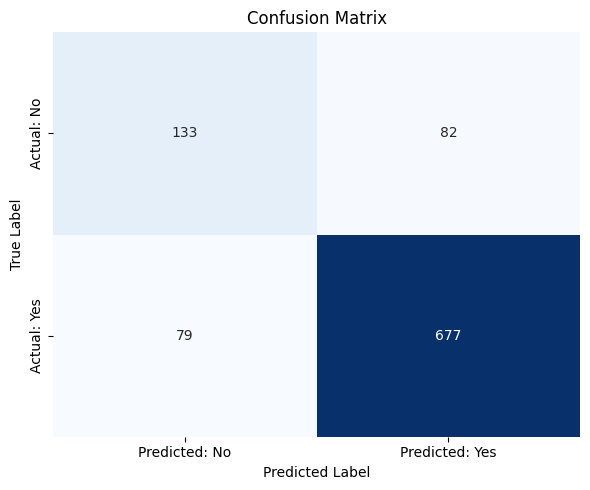

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

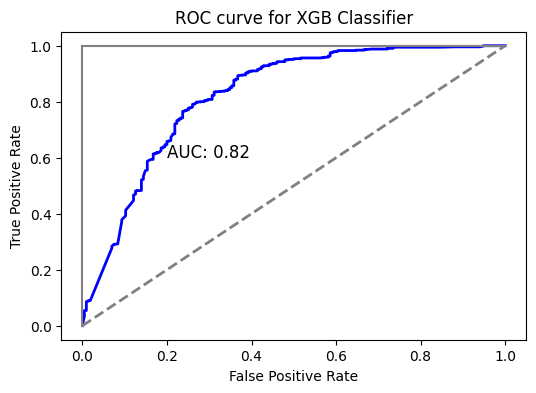

In [ ]:
# ROC Curve for XGB Classifier

y_probabilities = best_model.predict_proba(X_test)[:,1]

false_positive_rate_xgb, true_positive_rate_xgb, threshold_xgb = roc_curve(y_test,y_probabilities)

xgb_AUC = roc_auc_score(y_test,y_probabilities)

#Plotting ROC Curve
plt.figure(figsize=(6,4))
plt.title('ROC curve for XGB Classifier')
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, linewidth=2, color='blue')
plt.plot([0,1],ls='--',linewidth=2, color='gray')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')

plt.text(0.2,0.6,'AUC: {:.2f}'.format(xgb_AUC),size= 12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

/tmp/ipython-input-103-3154929220.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)
/tmp/ipython-input-103-3154929220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)


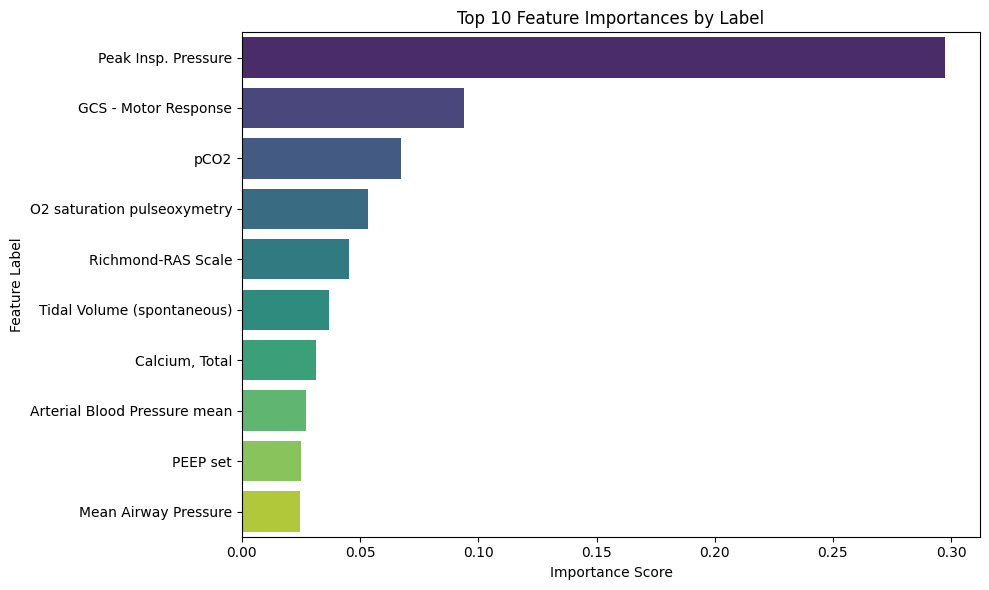

In [ ]:
# Get feature importances (as a Series for easy sorting)
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Reset to DataFrame for processing
importances_df = importances.reset_index()
importances_df.columns = ['feature', 'importance']

# Extract label (e.g., strip '_binX' or similar suffixes)
importances_df['label'] = importances_df['feature'].apply(lambda x: x.split('_bin')[0])

# Group by label and sum importances
label_importances = importances_df.groupby('label', as_index=False)['importance'].sum()

# Sort and take top 10
top_features_df = label_importances.sort_values(by='importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='label', data=top_features_df, palette='viridis', ci=None)
plt.title('Top 10 Feature Importances by Label')
plt.xlabel('Importance Score')
plt.ylabel('Feature Label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
)

# Get predicted labels (0 or 1)
y_pred = best_model.predict(X_test)

# Confusion matrix: [[TN, FP], [FN, TP]]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity / Recall / True Positive Rate
sensitivity = recall_score(y_test, y_pred)

# Specificity = TN / (TN + FP)
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

# Precision = TP / (TP + FP)
precision = precision_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Accuracy (optional)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Sensitivity (Recall): {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Sensitivity (Recall): 0.896
Specificity: 0.619
Precision: 0.892
F1 Score: 0.894
Accuracy: 0.834
